In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('COVID_Daily_Count.csv')
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Active
0,30 January,1,1,0,0,0,0,1
1,31 January,0,1,0,0,0,0,1
2,01 February,0,1,0,0,0,0,1
3,02 February,1,2,0,0,0,0,2
4,03 February,1,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...
59,29 March,110,1139,17,102,3,27,1010
60,30 March,208,1347,35,137,16,43,1167
61,31 March,288,1635,13,150,6,49,1436
62,01 April,424,2059,19,169,7,56,1834


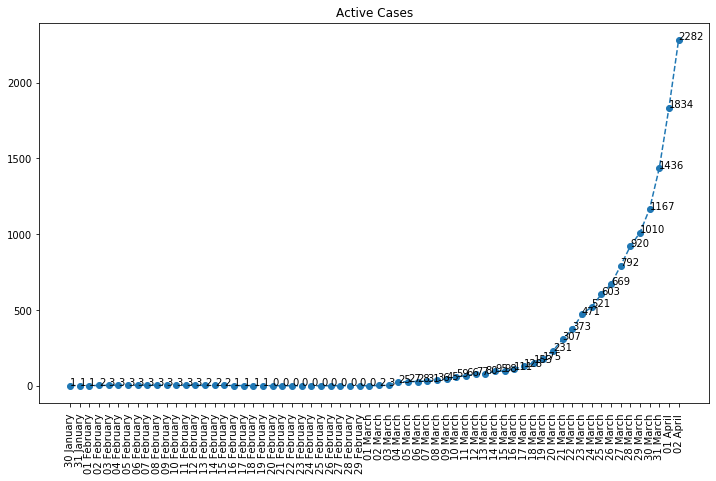

In [4]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Active Cases')
ax.plot(df['Date'], df['Active'], marker='o', linestyle='--')

for i,j in zip(df['Date'], df['Active']):
    plt.text(i,j, str(j))
plt.xticks(rotation=90)
plt.show()

# fig, ax = plt.subplots(figsize=(15,5))
# sns.plot(x=df_total["Date"], y=df_total['Active'])

# Daily Case Analysis

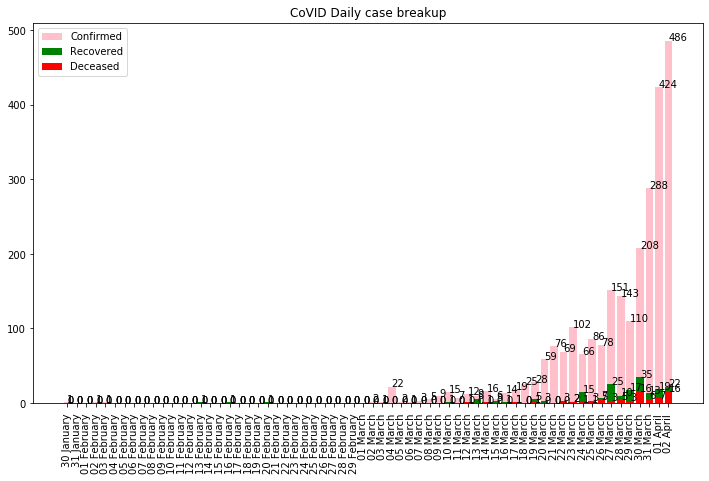

In [5]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID Daily case breakup')

ax.bar(df['Date'], df['Daily Confirmed'], color='pink')
for i,j in zip(df['Date'], df['Daily Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(df['Date'], df['Daily Recovered'], color='green')
for i,j in zip(df['Date'], df['Daily Recovered']):
    plt.text(i,j, str(j))
    
ax.bar(df['Date'], df['Daily Deceased'], color='red')
for i,j in zip(df['Date'], df['Daily Deceased']):
    plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

# Total Case Analysis

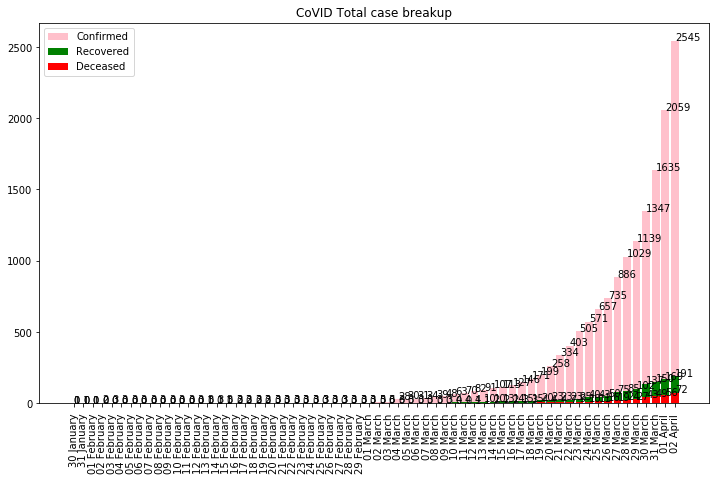

In [6]:
fig = plt.figure(figsize=((12,7)))
ax = fig.add_subplot(111)
ax.set_title('CoVID Total case breakup')

ax.bar(df['Date'], df['Total Confirmed'], color='pink')
for i,j in zip(df['Date'], df['Total Confirmed']):
    plt.text(i,j, str(j))
        

ax.bar(df['Date'], df['Total Recovered'], color='green')
for i,j in zip(df['Date'], df['Total Recovered']):
    plt.text(i,j, str(j))
    
ax.bar(df['Date'], df['Total Deceased'], color='red')
for i,j in zip(df['Date'], df['Total Deceased']):
    plt.text(i,j, str(j))
        

# ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
# ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Confirmed',
            'Recovered', 
            'Deceased'])
plt.xticks(rotation=90)
plt.show()

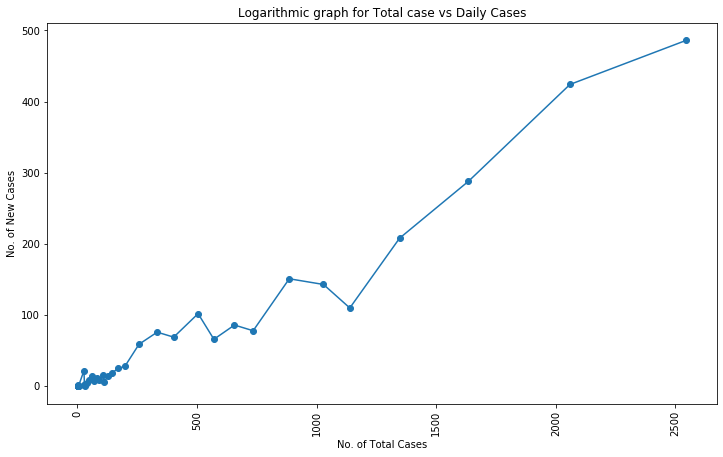

In [7]:
def log(num):
    if num == 0:
        return 0
    return np.log(num)

df['Log_Total_confirm'] = df['Total Confirmed'].astype(int).apply(log)
df['Log_daily_confirm'] = df['Daily Confirmed'].astype(int).apply(log)

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title('Logarithmic graph for Total case vs Daily Cases')
ax.plot(df['Total Confirmed'], df['Daily Confirmed'], marker='o')
ax.set_xlabel('No. of Total Cases')
ax.set_ylabel('No. of New Cases')
plt.xticks(rotation=90)
plt.show()